This is a RF classifer that was made in response to the analysis of the fitness data used in the megaGymDatset.csv. Hence, the issues that occured in the regression model will hoepfully be alleviated here. 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import seaborn 
import pandas as pd

In [28]:
original_fitness_csv = pd.read_csv('C:/Users/zeroc/OneDrive/Desktop/PortfolioProjects/Fitnessdata/megaGymDataset.csv')

columns = ["Type", "BodyPart", "Equipment", "Level", "Rating"]

fitness_csv = original_fitness_csv[columns]

fitness_csv = fitness_csv.dropna()

ord_enc = OrdinalEncoder()

#fit_transform is the call to turn string into numerical. Must take in a 2-d array hence why there is 2 brackets
fitness_csv["Type"] = ord_enc.fit_transform(fitness_csv[["Type"]])
fitness_csv["BodyPart"] = ord_enc.fit_transform(fitness_csv[["BodyPart"]])
fitness_csv["Equipment"] = ord_enc.fit_transform(fitness_csv[["Equipment"]])
fitness_csv["Level"] = ord_enc.fit_transform(fitness_csv[["BodyPart"]])

fitness_csv[:]

,Type,BodyPart,Equipment,Level,Rating
0,4.0,0.0,0.0,0.0,0.0
8,4.0,0.0,1.0,0.0,8.9
9,4.0,0.0,1.0,0.0,8.9
10,4.0,0.0,1.0,0.0,8.5
11,4.0,0.0,1.0,0.0,8.3
...,...,...,...,...,...
2910,2.0,16.0,10.0,16.0,8.2
2911,4.0,16.0,5.0,16.0,9.3
2912,4.0,16.0,5.0,16.0,9.0
2913,4.0,16.0,5.0,16.0,8.1


Next we have separate the continum in the Rating Column into a number of labels. The Ratings go from 0 to 10. Hence, we will have 5 labels: 
- Very Bad: < 2
- Bad: 2 <= and < 4
- Okay: 4 <= and < 6
- Good: 6 <= and < 8
- Amazing: 8 <= and <10

We will categorize the labels as the following numeric values:
- Very Bad: 0
- Bad: 1
- Okay: 2
- Good: 3
- Amazing: 4

Looks kinda of like my elementary school grading chart

In [29]:
#Note to self do not run this cell by itself. It will change the actual fitness_csv DataFrame. Prbly shld change it so it makes a new copy in this cell
#but im too lazy too. So run the cells above pls. 
fitness_csv.loc[fitness_csv["Rating"] < 2, "Rating"] = 0
fitness_csv.loc[(fitness_csv["Rating"] >= 2) & (fitness_csv["Rating"] < 4), "Rating"] = 1
fitness_csv.loc[(fitness_csv["Rating"] >= 4) & (fitness_csv["Rating"] < 6), "Rating"] = 2
fitness_csv.loc[(fitness_csv["Rating"] >= 6) & (fitness_csv["Rating"] < 8), "Rating"] = 3
fitness_csv.loc[(fitness_csv["Rating"] >= 8) & (fitness_csv["Rating"] <= 10), "Rating"] = 4

fitness_csv[:10]

,Type,BodyPart,Equipment,Level,Rating
0,4.0,0.0,0.0,0.0,0.0
8,4.0,0.0,1.0,0.0,4.0
9,4.0,0.0,1.0,0.0,4.0
10,4.0,0.0,1.0,0.0,4.0
11,4.0,0.0,1.0,0.0,4.0
12,4.0,0.0,1.0,0.0,3.0
13,4.0,0.0,1.0,0.0,2.0
20,4.0,0.0,8.0,0.0,4.0
21,4.0,0.0,8.0,0.0,3.0
22,4.0,0.0,8.0,0.0,3.0


Ran a pairplot for each column. Same graphs as regression to no surprise. So is the heatmap. 

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


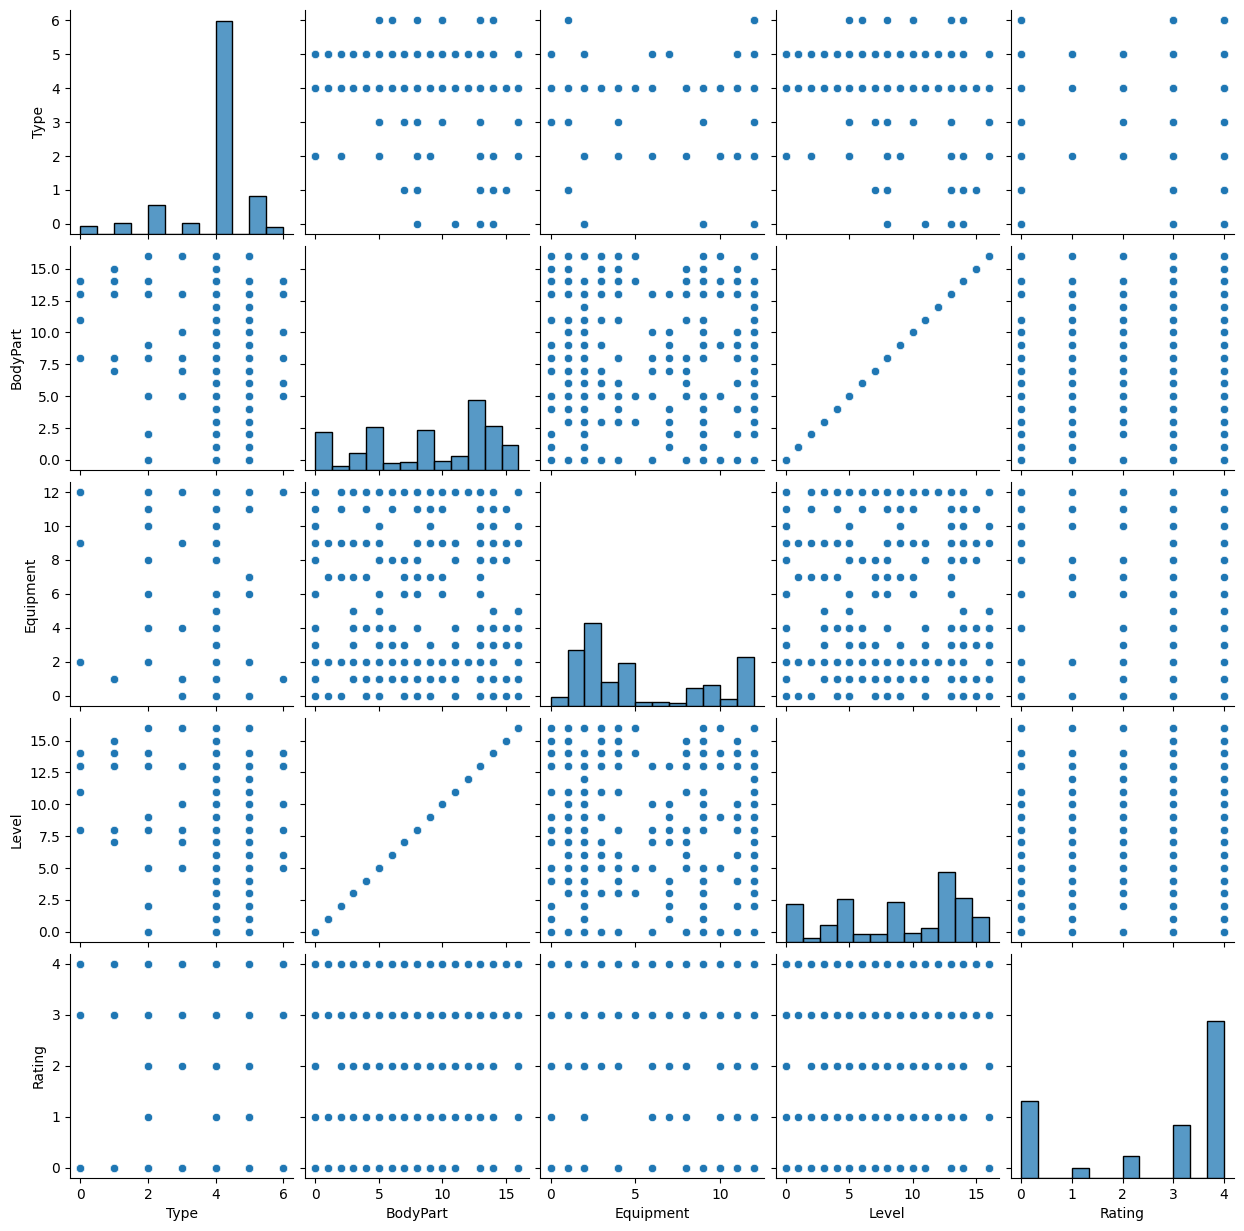

In [30]:
seaborn.pairplot(fitness_csv)

<Axes: >

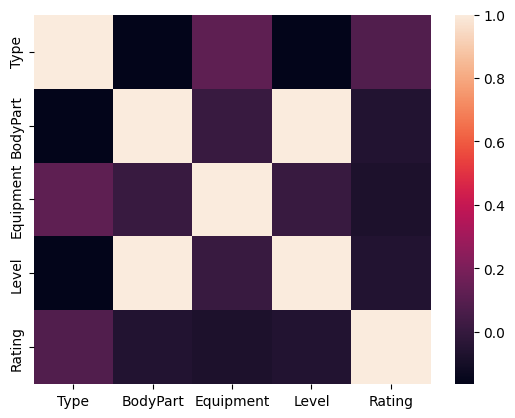

In [31]:
seaborn.heatmap(fitness_csv.corr(), xticklabels = fitness_csv.columns, yticklabels = fitness_csv.columns)

Separated into training and validation data

In [32]:
features = ["Type", "BodyPart", "Equipment", "Level"]
X = fitness_csv[features]
y = fitness_csv.Rating

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

Next I decided to normalize the data. I haven't really thought about this process in the regression model as this is something I got from looking at other people's code. But normalizing the train_X and val_X will essentially let the mean of the datasets to be 0 with a variance of 1 through computing the z-score, hence why its called normalization. 

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

normed_train_X = pd.DataFrame(sc.fit_transform(train_X), columns = X.columns)
normed_val_X = pd.DataFrame(sc.fit_transform(val_X), columns= X.columns)

Finally its time to implement the RandomForestClassifier

In [34]:
rf_class = RandomForestClassifier()
rf_class.fit(normed_train_X, train_y)

rf_predictions = rf_class.predict(normed_val_X)


Next I wanted to see how well the model performed by using the score metric. 

In [35]:
print(rf_class.score(normed_train_X, train_y))
print(rf_class.score(normed_val_X, val_y))

0.6972833117723156
0.5271317829457365


Note that the score for the training is much higher than that of the testing data. Hence, we can assume some overfitting is occuring. However, with R2 values that egregious honestly it really doesn't make that much of a difference. 

You can even kinda of see it with the pairplots above, There is no real strong correlation with any of the features with the testing data. The heat map also shows it. 